In [1]:

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
%matplotlib inline

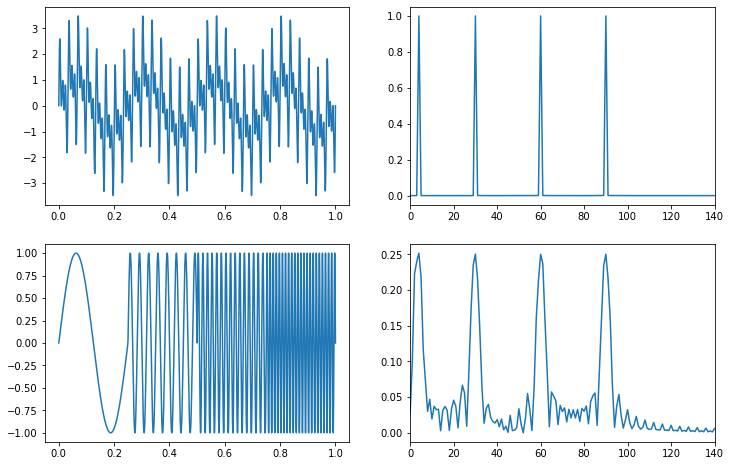

In [14]:
# Fourier transform introduction
t_n = 1
N = pow(10,5)
T = t_n / N
f_s = 1 / T

xa = np.linspace(0,t_n,N)
xb = np.linspace(0, t_n/4, N//4)

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values_1, fft_values_1 = np.linspace(0.0, 1.0/(2.0*T), N//2),fft(composite_signal1)
f_values_2, fft_values_2 = np.linspace(0.0, 1.0/(2.0*T), N//2),fft(composite_signal2)
# print(len(composite_signal1))
# print(len(fft_values_1))

fig, axarr = plt.subplots(2,2,figsize=(12,8))
axarr[0,0].plot(xa,composite_signal1)
axarr[1,0].plot(xa,composite_signal2)
axarr[0,1].plot(f_values_1,2.0/N * np.abs(fft_values_1[:N//2]))
axarr[0,1].set_xlim([0,140])
axarr[1,1].plot(f_values_2,2.0/N * np.abs(fft_values_2[:N//2]))
axarr[1,1].set_xlim([0,140])


plt.show()

In [15]:
# Different types of mother wavelets
import pywt
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [ ]:
# A wavelet must just have two conditions to satisfy:
# 1. finite energy
# 2. zero mean

/home/pp-dev/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


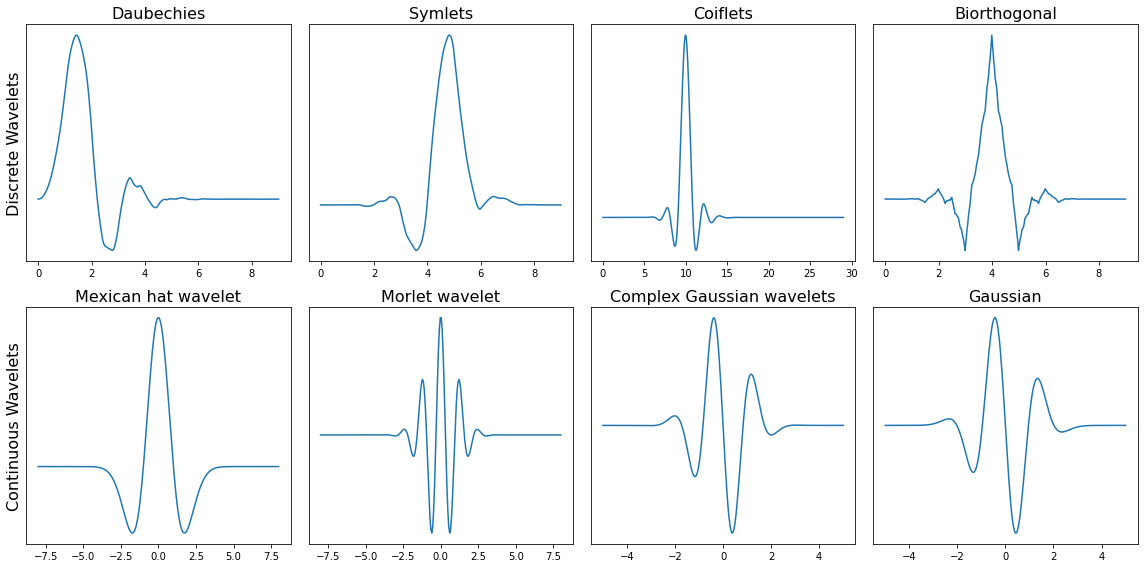

In [18]:
discrete_wavelets = ['db5','sym5','coif5','bior2.4']
cont_wavelets = ['mexh','morl','cgau5','gaus5']

list_list_wavelets  = [discrete_wavelets,cont_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(2,4,figsize=(16,8))
for ii,list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal  = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function,x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no,col_no].set_ylabel("Discrete Wavelets",fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no,col_no].set_ylabel("Continuous Wavelets",fontsize =16)
        axarr[row_no,col_no].set_title(f"{family_name}",fontsize=16)
        axarr[row_no,col_no].plot(x_values,wavelet_function)
        axarr[row_no,col_no].set_yticks([])
        axarr[row_no,col_no].set_yticklabels([])
        
plt.tight_layout()
plt.show()
        
        


['db1', 'db2', 'db3', 'db4', 'db5']


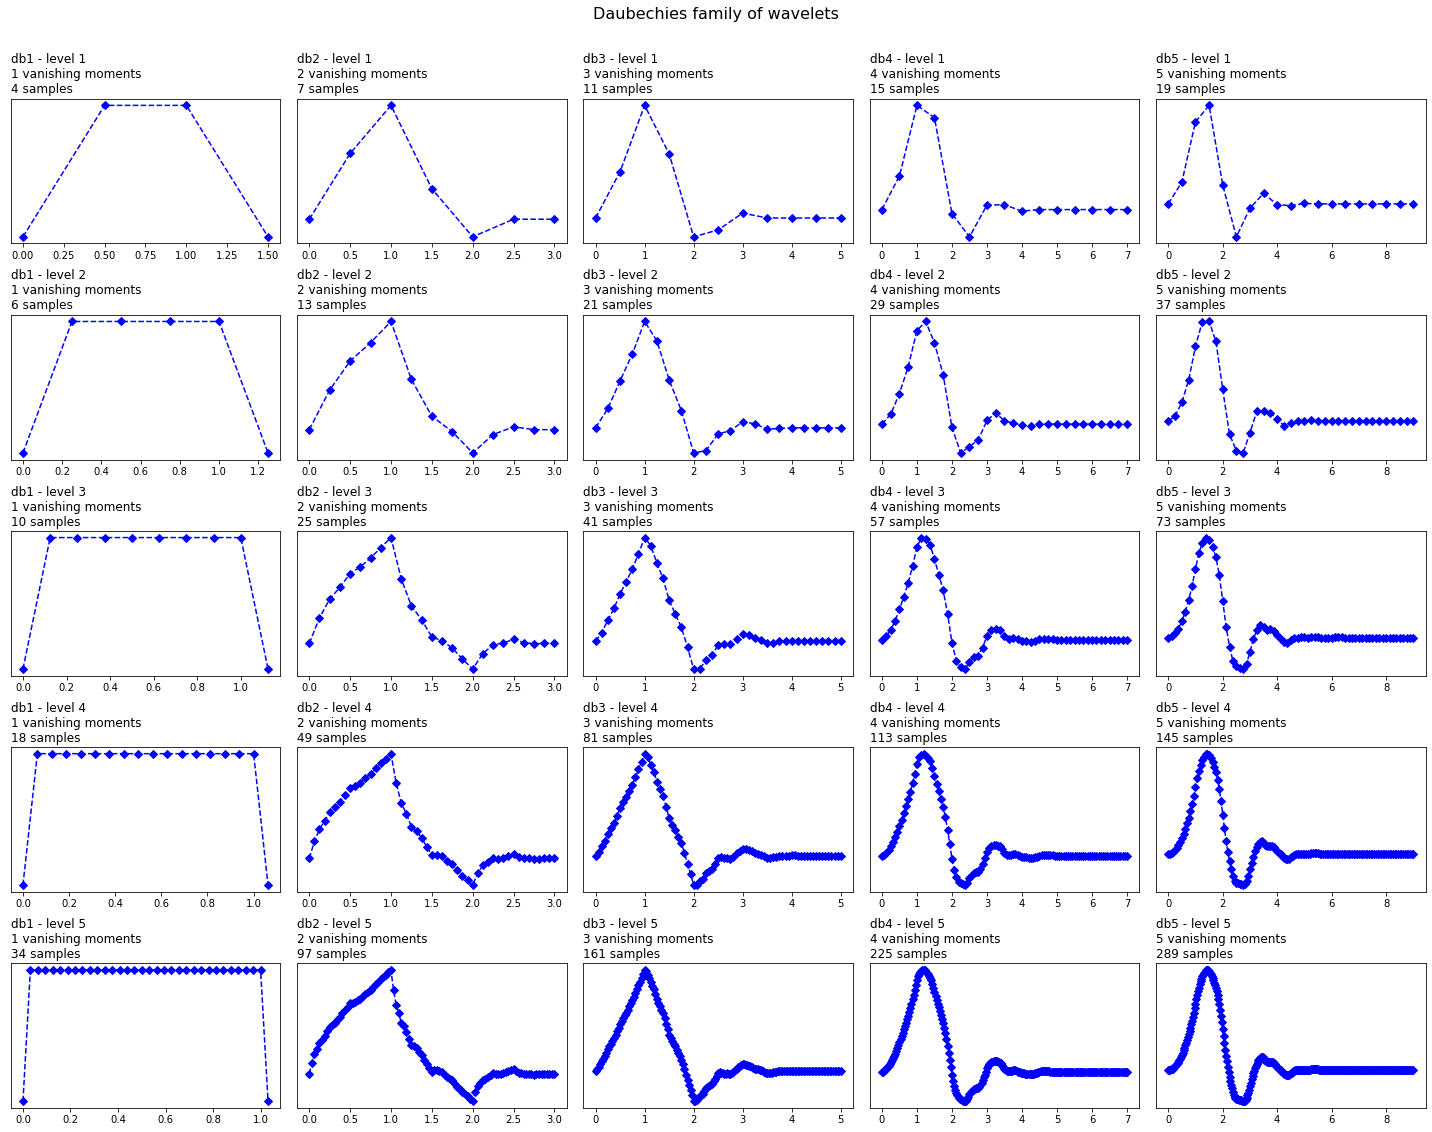

In [21]:
# Different subcategories exist within a family of wavelets
db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)

fig,axarr = plt.subplots(5,5,figsize=(20,16))
fig.suptitle("Daubechies family of wavelets",fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level=level)
        axarr[row_no,col_no].set_title(f"{waveletname} - level {level}\n{no_moments} vanishing moments\n{len(x_values)} samples",loc="left")
        axarr[row_no,col_no].plot(x_values,wavelet_function, 'bD--')
        axarr[row_no,col_no].set_yticks([])
        axarr[row_no,col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
                                                        

In [ ]:
# If a wavelet has p vanishing moments, it can approximate polynomials of degree p-1

In [23]:
# File handling and mods
!unzip "data/UCI HAR Dataset.zip"
!mv "UCI HAR Dataset" "data/"
!mv "data/UCI HAR Dataset" "data/UCI_HAR"

Archive:  data/UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
   creating: UCI HAR Dataset/test/
  inflating: UCI HAR Dataset/test/subject_test.txt  
  inflating: UCI HAR Dataset/test/X_test.txt  
  inflating: UCI HAR Dataset/test/y_test.txt  
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt  
  inflating: UCI HAR Dataset/features.

In [25]:
def read_signals_ucihar(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels_ucihar(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities

def load_ucihar_data(folder):
    train_folder = folder + 'train/Inertial Signals/'
    test_folder = folder + 'test/Inertial Signals/'
    labelfile_train = folder + 'train/y_train.txt'
    labelfile_test = folder + 'test/y_test.txt'
    train_signals, test_signals = [], []
    for input_file in os.listdir(train_folder):
        signal = read_signals_ucihar(train_folder + input_file)
        train_signals.append(signal)
    train_signals = np.transpose(np.array(train_signals), (1, 2, 0))
    for input_file in os.listdir(test_folder):
        signal = read_signals_ucihar(test_folder + input_file)
        test_signals.append(signal)
    test_signals = np.transpose(np.array(test_signals), (1, 2, 0))
    train_labels = read_labels_ucihar(labelfile_train)
    test_labels = read_labels_ucihar(labelfile_test)
    return train_signals, train_labels, test_signals, test_labels

folder_ucihar = './data/UCI_HAR/' 
train_signals_ucihar, train_labels_ucihar, test_signals_ucihar, test_labels_ucihar = load_ucihar_data(folder_ucihar)

In [26]:
scales = range(1,128)
waveletname = 'morl'
train_size = 5000
test_size= 500

train_data_cwt = np.ndarray(shape=(train_size, 127, 127, 9))

for ii in range(0,train_size):
    if ii % 1000 == 0:
        print(ii)
    for jj in range(0,9):
        signal = uci_har_signals_train[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        train_data_cwt[ii, :, :, jj] = coeff_

test_data_cwt = np.ndarray(shape=(test_size, 127, 127, 9))
for ii in range(0,test_size):
    if ii % 100 == 0:
        print(ii)
    for jj in range(0,9):
        signal = uci_har_signals_test[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        test_data_cwt[ii, :, :, jj] = coeff_

uci_har_labels_train = list(map(lambda x: int(x) - 1, uci_har_labels_train))
uci_har_labels_test = list(map(lambda x: int(x) - 1, uci_har_labels_test))

x_train = train_data_cwt
y_train = list(uci_har_labels_train[:train_size])
x_test = test_data_cwt
y_test = list(uci_har_labels_test[:test_size])

0


NameError: name 'uci_har_signals_train' is not defined